# Wine Dataset Analysis

The goal of this project is to build a machine learning model that can predict the origin/class of wines based on their chemical properties. This is a multiclass classification problem, where the target variable is the wine class (0, 1, or 2). I am going to be using the wine dataset from sklearn to train the model as well as testing the model on randomly generated values.

Class 0: This class represents wines made from the Barolo cultivar, known for their high alcohol content and robust levels of phenols, including flavonoids, contributing to their rich aroma, color, and flavor profile. These wines typically exhibit a higher level of nonflavonoid phenols, adding to their characteristic bitterness and astringency.

Class 1: Wines in this class are derived from the Grignolino cultivar, featuring lower alcohol levels and reduced phenolic content, yet they have a higher color intensity and are characterized by their higher flavan-3-ol content. This class is distinguished by a subtle balance of flavor and aroma, with a comparatively lighter body.

Class 2: Originating from the Barbera grape, these wines have the lowest alcohol content and the least phenolic compounds among the three, leading to a lighter body and less intense color and flavor. They are marked by their lower levels of flavonoids and malic acid, contributing to a distinctively smooth and approachable character.

### Load in packages and dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings

# Load the wine dataset
wine = load_wine()
wine_data = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                         columns=wine['feature_names'] + ['target'])

### Exploratory analysis of the dataset

In [6]:
print(wine_data.head())
print(wine_data.describe())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

### Visualizing Distributiuons

<Figure size 1500x1000 with 0 Axes>

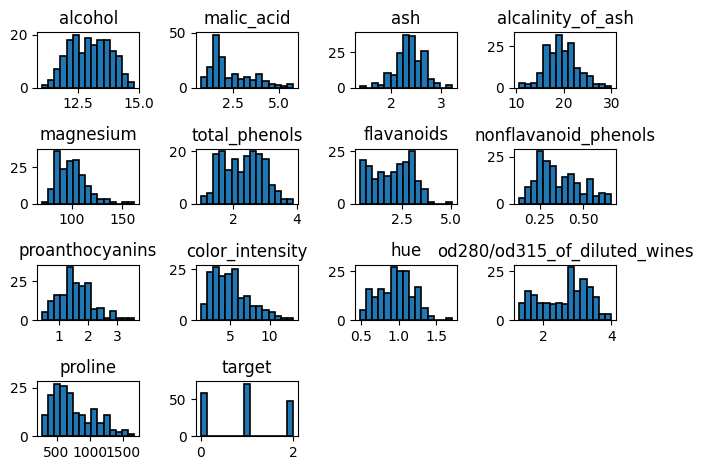

In [7]:
plt.figure(figsize=(15, 10))
wine_data.hist(bins=15, edgecolor='black', linewidth=1.2, grid=False)
plt.tight_layout()
plt.show()

Correlation Heatmap

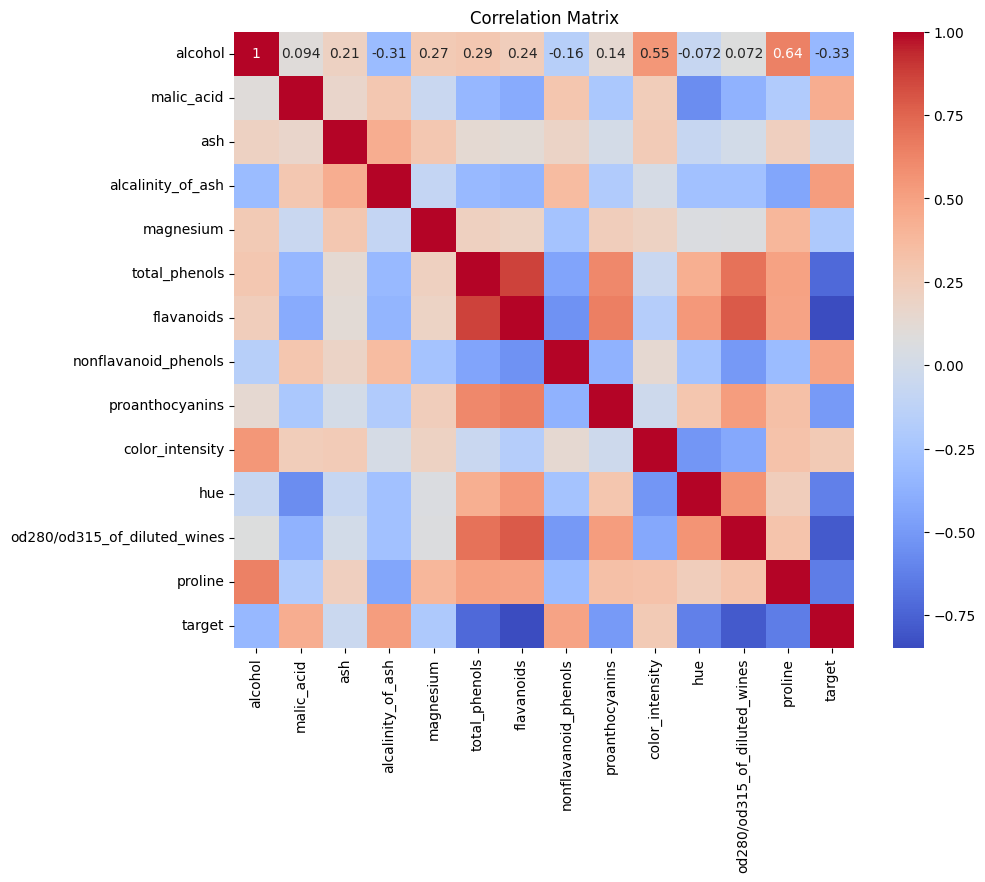

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pair Plots

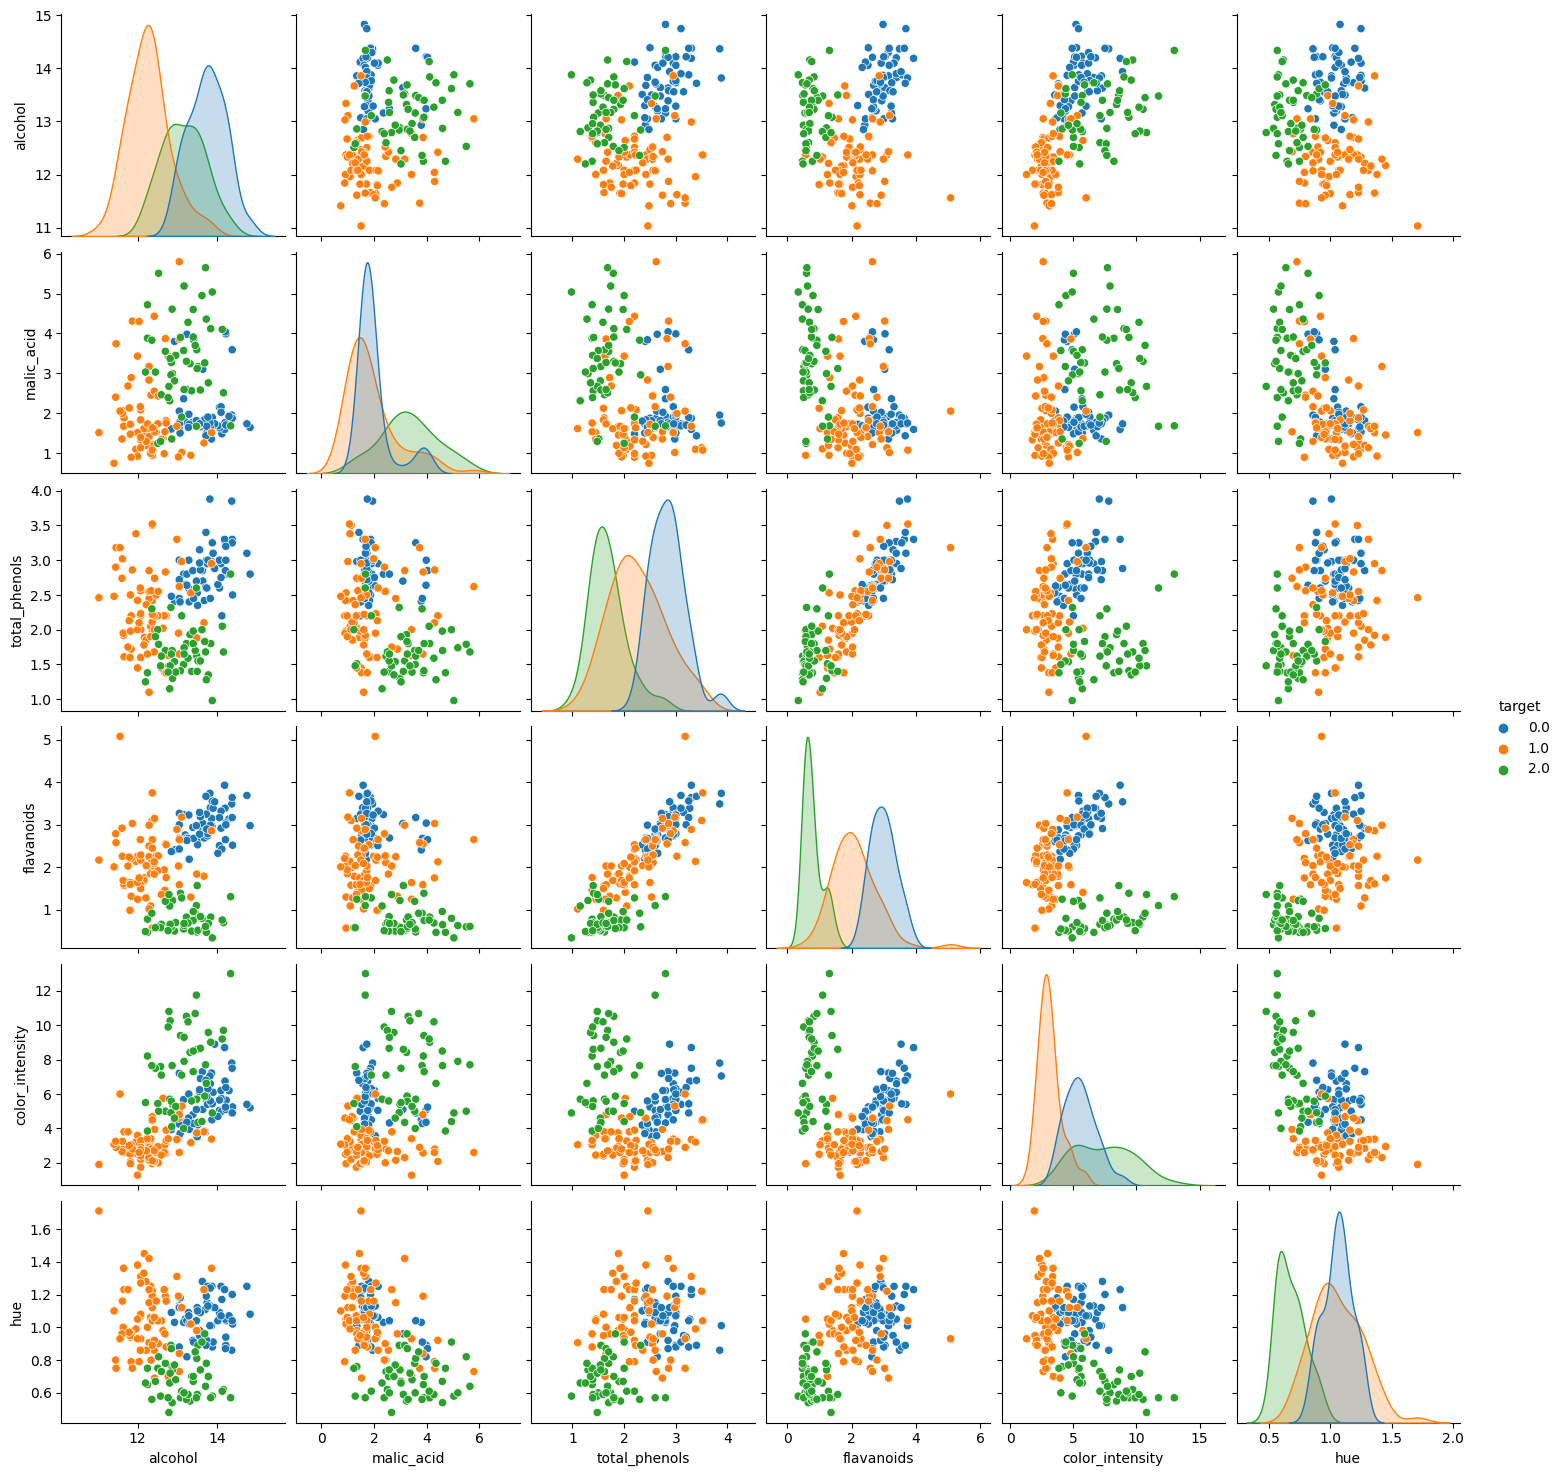

In [34]:
warnings.filterwarnings("ignore")

selected_features = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'hue']

wine_data_subset = wine_data[selected_features]
wine_data_subset['target'] = wine_data['target'].astype('category')

sns.pairplot(wine_data_subset, hue='target')
plt.show()

### Model building and training

In [13]:
# Separate features (X) and target variable (y)
X = wine_data.drop('target', axis=1)
y = wine_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [1.         1.         0.92857143 0.96428571 1.        ]
Mean CV accuracy: 0.9785714285714286
Test set accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Evaluation of wine features

Feature Importance:
                         Feature  Importance
6                     flavanoids    0.202293
9                color_intensity    0.171202
12                       proline    0.139046
0                        alcohol    0.112398
11  od280/od315_of_diluted_wines    0.111564
10                           hue    0.070891
4                      magnesium    0.036841
1                     malic_acid    0.035703
3              alcalinity_of_ash    0.032425
5                  total_phenols    0.029279
8                proanthocyanins    0.023561
2                            ash    0.021282
7           nonflavanoid_phenols    0.013515

Model Suitability Evaluation:
Test Set Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
 

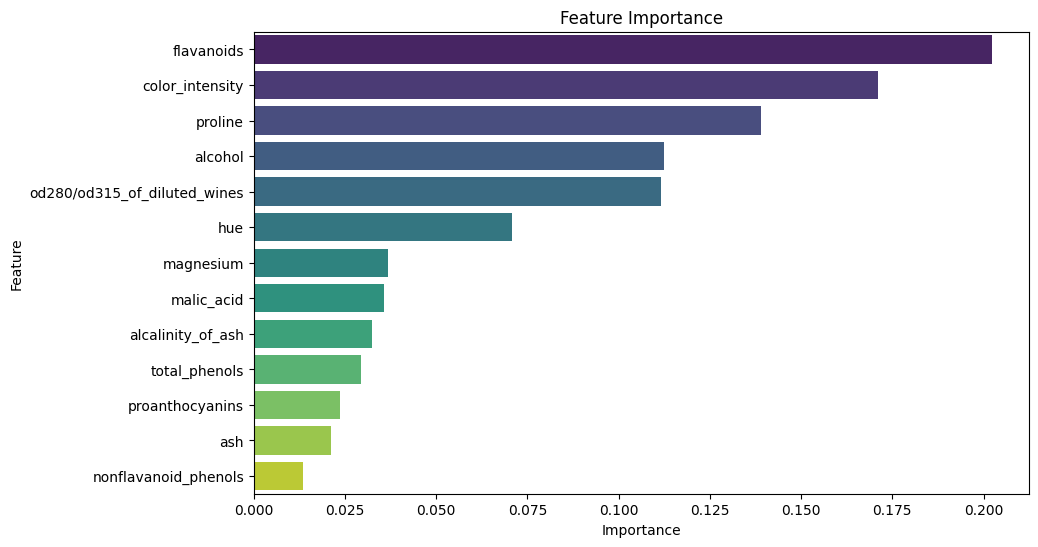

In [15]:
# Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance_df)

# Model Suitability Evaluation
print("\nModel Suitability Evaluation:")
print("Test Set Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Limitations and Future Work
print("\nLimitations and Future Work:")
print("1. Limitations:")
print("- Limited dataset size may affect model generalization.")
print("- Lack of domain-specific features could impact predictive power.")
print("2. Future Work Suggestions:")
print("- Collect more data to improve model performance.")
print("- Explore additional features related to wine characteristics.")
print("- Experiment with other classification algorithms for comparison.")

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Test model with randomly generated values

In [30]:
warnings.filterwarnings("ignore")

def generate_random_data():
    random_data = []
    for feature in wine_data.columns[:-1]:  # Exclude the target column
        min_val = wine_data[feature].min()
        max_val = wine_data[feature].max()
        random_value = np.random.uniform(min_val, max_val)
        random_data.append(random_value)
    return random_data

# Generate a random data point
random_data_point = generate_random_data()

# Standardize the data point using the same scaler from training
random_data_point_scaled = scaler.transform([random_data_point])

# Predict the class of the generated data point using the trained model
predicted_class = rf_model.predict(random_data_point_scaled)

# Map the predicted class to the actual class label
class_labels = {0: 'Class 0', 1: 'Class 1', 2: 'Class 2'}
predicted_class_label = class_labels[predicted_class[0]]

# Display the randomly generated data point and its predicted class
print("Randomly Generated Data Point:", random_data_point)
print("Predicted Class:", predicted_class_label)

Randomly Generated Data Point: [14.530313693871035, 3.1643178338589495, 1.5002507431119387, 28.993909683333904, 137.65287899470178, 1.0226216099792083, 2.5143835836416506, 0.5229123220641788, 1.7269685765702019, 12.849668098476501, 1.396531706843592, 3.8721757222784174, 1345.7057907563988]
Predicted Class: Class 0


Repeat with 1000 examples and determine accuracy

In [33]:
warnings.filterwarnings("ignore")

# Generate and test 1000 random examples
num_examples = 1000
correct_predictions = 0

for _ in range(num_examples):
    # Generate a random data point
    random_data_point = generate_random_data()

    # Standardize the data point using the same scaler from training
    random_data_point_scaled = scaler.transform([random_data_point])

    # Predict the class of the generated data point using the trained model
    predicted_class = rf_model.predict(random_data_point_scaled)

    # Check if the prediction is correct
    if predicted_class[0] == wine_data['target'].mode()[0]:  # Most frequent class in the original dataset
        correct_predictions += 1

# Calculate accuracy
accuracy = (correct_predictions / num_examples) * 100

# Print accuracy of classifications
print(f"Accuracy of classifications for {num_examples} random examples: {accuracy:.2f}%")

Accuracy of classifications for 1000 random examples: 51.00%


### Results and Conclusion

Based on the analysis conducted on the wine dataset, several key conclusions can be drawn. Firstly, the exploratory data analysis revealed important insights into the distribution of features, correlations between variables, and the overall structure of the dataset. Feature importance analysis indicated that certain attributes, such as flavanoids, color intensity, and alcohol content, significantly influence wine classification. The Random Forest classifier demonstrated okay performance with an accuracy around 50% on the random value test set, supported by a detailed classification report showcasing high precision and recall for all classes in the original dataset. It is worth noting that when the data is randomly generated it may not mimick realistic values in wine which could explain lower correct classification rate. I thought this was important to include to see how the model performs under random conditions but the random conditions could be tweaked to better mimick real wine values.


However, the analysis also identified limitations, including the relatively small dataset size and the absence of domain-specific features that could enhance predictive power. A larger dataset with more variance in values would surely improce model accuracy. Future work could focus on collecting more data, exploring additional features related to wine characteristics, and experimenting with alternative machine learning algorithms for further improvement and comparison. Overall, the analysis provides valuable insights for understanding wine classification and suggests avenues for future research and refinement of predictive models.